In [52]:
import pandas as pd

import sys
print(sys.version)
sys.path.append('../../')
sys.path.append('../')
sys.path.append('../../../')


from drive.model_training.data_utils.extractors import * 
from drive.model_training.data_utils.animate_time_constant import * 
from first_order_model import *

from drive.util.model_func import *
from drive.util.transform_algebra import *



import matplotlib.animation as animation
from matplotlib.backend_bases import KeyEvent

import tqdm
import pickle

from matplotlib.backends.backend_pdf import PdfPages


3.10.12 (main, Jul 19 2024, 11:05:56) [GCC 11.4.0]


In [53]:
color_dict = {"asphalt":"grey", "ice":"blue","gravel":"orange","grass":"green"}

steady_state_path = "/home/nicolassamson/ros2_ws/src/DRIVE/drive_datasets/results_multiple_terrain_dataframe/all_terrain_steady_state_dataset.pkl"
df_diamond = pd.read_pickle(steady_state_path)

df_warthog = df_diamond.loc[df_diamond["robot"]=="warthog"]

df_sampling_speed = df_warthog.loc[df_warthog["max_linear_speed_sampled"]==5.0]


In [54]:

print_column_unique_column(df_sampling_speed)


['cmd_body_x_lwmean' 'cmd_body_yaw_lwmean' 'cmd_left_wheels'
 'cmd_right_wheels' 'diff_body_wheel_time_constants'
 'diff_body_wheel_time_delay'
 'diff_body_wheel_time_for_63_percent_ss_value'
 'diff_body_wheel_time_for_86_percent_ss_value'
 'diff_body_wheel_time_for_95_percent_ss_value' 'icp_vel_x_smoothed'
 'icp_vel_yaw_smoothed' 'id' 'left_wheel_vel_centered'
 'left_wheel_vel_gains' 'left_wheel_vel_operation_points'
 'left_wheel_vel_predictions' 'left_wheel_vel_steps'
 'left_wheel_vel_time_constants' 'left_wheel_vel_time_delay'
 'left_wheel_vel_time_delay_problematic_computation'
 'left_wheel_vel_time_for_63_percent_ss_value'
 'left_wheel_vel_time_for_86_percent_ss_value'
 'left_wheel_vel_time_for_95_percent_ss_value' 'max_ang_speed_sampled'
 'max_linear_speed_sampled' 'odom_speed_left_wheels'
 'odom_speed_right_wheels' 'right_wheel_vel_centered'
 'right_wheel_vel_gains' 'right_wheel_vel_operation_points'
 'right_wheel_vel_predictions' 'right_wheel_vel_steps'
 'right_wheel_vel_time_c

array(['cmd_body_x_lwmean', 'cmd_body_yaw_lwmean', 'cmd_left_wheels',
       'cmd_right_wheels', 'diff_body_wheel_time_constants',
       'diff_body_wheel_time_delay',
       'diff_body_wheel_time_for_63_percent_ss_value',
       'diff_body_wheel_time_for_86_percent_ss_value',
       'diff_body_wheel_time_for_95_percent_ss_value',
       'icp_vel_x_smoothed', 'icp_vel_yaw_smoothed', 'id',
       'left_wheel_vel_centered', 'left_wheel_vel_gains',
       'left_wheel_vel_operation_points', 'left_wheel_vel_predictions',
       'left_wheel_vel_steps', 'left_wheel_vel_time_constants',
       'left_wheel_vel_time_delay',
       'left_wheel_vel_time_delay_problematic_computation',
       'left_wheel_vel_time_for_63_percent_ss_value',
       'left_wheel_vel_time_for_86_percent_ss_value',
       'left_wheel_vel_time_for_95_percent_ss_value',
       'max_ang_speed_sampled', 'max_linear_speed_sampled',
       'odom_speed_left_wheels', 'odom_speed_right_wheels',
       'right_wheel_vel_centered', '

## Add column 

In [55]:
slip = 'slip_body_norm_x_y_ss'
df_sampling_speed[slip] = np.sqrt(df_sampling_speed.slip_body_x_ss**2 + df_sampling_speed.slip_body_y_ss**2) 


command_centrifugal_forces = df_sampling_speed.cmd_body_x_lwmean * df_sampling_speed.cmd_body_yaw_lwmean


df_sampling_speed["commanded_centrifgual_force"] = command_centrifugal_forces

/tmp/ipykernel_30073/3072118173.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampling_speed[slip] = np.sqrt(df_sampling_speed.slip_body_x_ss**2 + df_sampling_speed.slip_body_y_ss**2)
/tmp/ipykernel_30073/3072118173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sampling_speed["commanded_centrifgual_force"] = command_centrifugal_forces


## Evaluate corroletion of first order model learned for the body vel and the terrain. 

Normalement, le gain devrait etre constant pour tout le modele 



/tmp/ipykernel_30073/4014976308.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


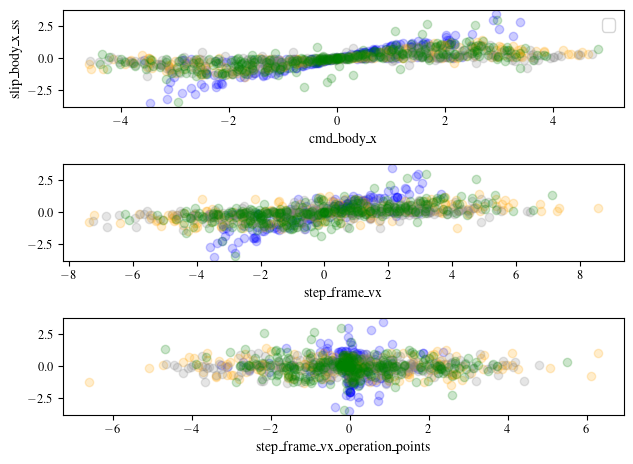

In [56]:
fig, ax = plt.subplots(3,1)

slip = 'slip_body_x_ss'


list_terrain = df_sampling_speed.terrain.unique()

for terrain in list_terrain:

    df_terrain = df_sampling_speed.loc[df_sampling_speed.terrain == terrain]
    
    # Scatter plot 
    ax[0].scatter(df_terrain.cmd_body_x_lwmean, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[1].scatter(df_terrain.step_frame_vx_steps, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[2].scatter(df_terrain.step_frame_vx_operation_points, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)

# Labels and title
ax[0].legend()
ax[0].set_xlabel('cmd_body_x')
ax[0].set_ylabel(slip)
ax[1].set_xlabel('step_frame_vx')
ax[2].set_xlabel('step_frame_vx_operation_points')
plt.tight_layout()


/tmp/ipykernel_30073/3211680834.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


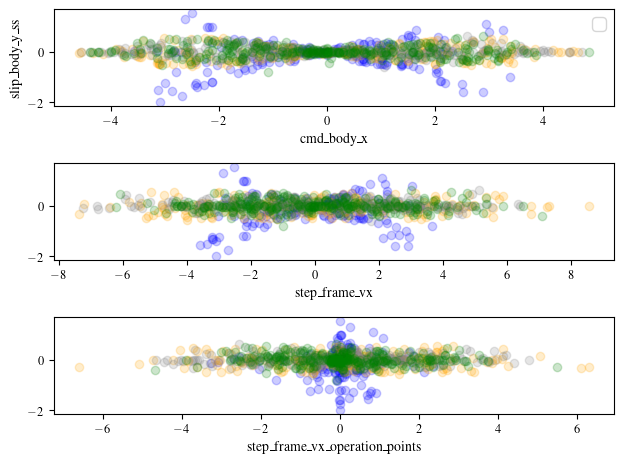

In [57]:
fig, ax = plt.subplots(3,1)

slip = 'slip_body_y_ss'


list_terrain = df_sampling_speed.terrain.unique()

for terrain in list_terrain:

    df_terrain = df_sampling_speed.loc[df_sampling_speed.terrain == terrain]
    
    # Scatter plot 
    ax[0].scatter(df_terrain.cmd_body_x_lwmean, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[1].scatter(df_terrain.step_frame_vx_steps, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[2].scatter(df_terrain.step_frame_vx_operation_points, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)

# Labels and title
ax[0].legend()
ax[0].set_xlabel('cmd_body_x')
ax[0].set_ylabel(slip)
ax[1].set_xlabel('step_frame_vx')
ax[2].set_xlabel('step_frame_vx_operation_points')
plt.tight_layout()

/tmp/ipykernel_30073/3988378400.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


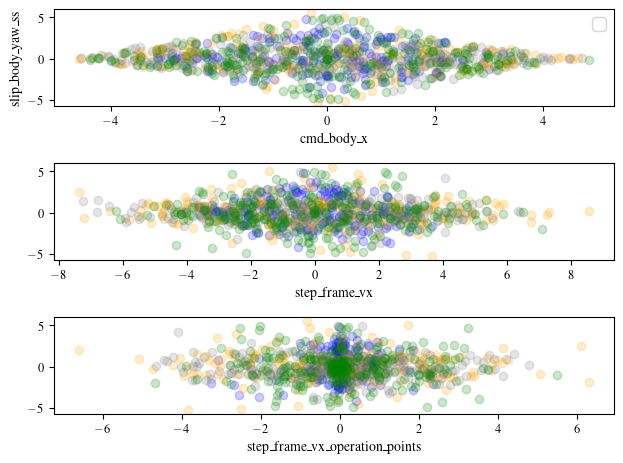

In [58]:
fig, ax = plt.subplots(3,1)

slip = 'slip_body_yaw_ss'


list_terrain = df_sampling_speed.terrain.unique()

for terrain in list_terrain:

    df_terrain = df_sampling_speed.loc[df_sampling_speed.terrain == terrain]
    
    # Scatter plot 
    ax[0].scatter(df_terrain.cmd_body_x_lwmean, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[1].scatter(df_terrain.step_frame_vx_steps, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[2].scatter(df_terrain.step_frame_vx_operation_points, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)

# Labels and title
ax[0].legend()
ax[0].set_xlabel('cmd_body_x')
ax[0].set_ylabel(slip)
ax[1].set_xlabel('step_frame_vx')
ax[2].set_xlabel('step_frame_vx_operation_points')
plt.tight_layout()

# Conclusion 

Les correlations les plus importantes sont lorsque l'ont travail dans le referentiel des commandes pour ce qui est de vx. 

/tmp/ipykernel_30073/3421954188.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


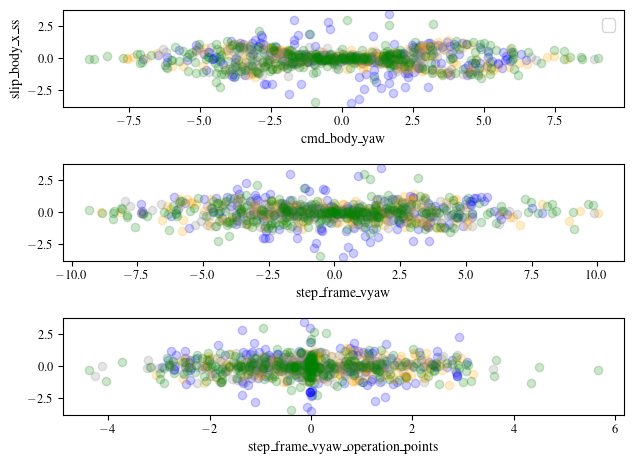

In [59]:
fig, ax = plt.subplots(3,1)

slip = 'slip_body_x_ss'


list_terrain = df_sampling_speed.terrain.unique()

for terrain in list_terrain:

    df_terrain = df_sampling_speed.loc[df_sampling_speed.terrain == terrain]
    
    # Scatter plot 
    ax[0].scatter(df_terrain.cmd_body_yaw_lwmean, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[1].scatter(df_terrain.step_frame_vyaw_steps, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[2].scatter(df_terrain.step_frame_vyaw_operation_points, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)

# Labels and title
ax[0].legend()
ax[0].set_xlabel('cmd_body_yaw')
ax[0].set_ylabel(slip)
ax[1].set_xlabel('step_frame_vyaw')
ax[2].set_xlabel('step_frame_vyaw_operation_points')
plt.tight_layout()


Il n'y a pas de grande correlation entre le step demande en yaw et le derapage en vx/ Par contre, plus la commande en yaw est grande, plus la correlation est importante. Mais ceci s'explique par le fait que l'on a un losange en commande. 


/tmp/ipykernel_30073/3514747825.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


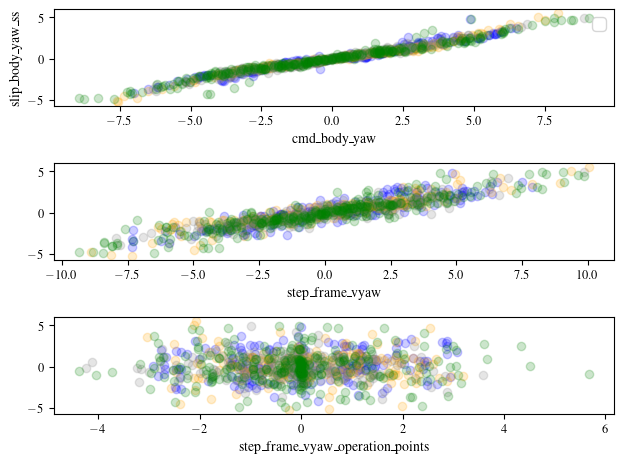

In [60]:
fig, ax = plt.subplots(3,1)

slip = 'slip_body_yaw_ss'


list_terrain = df_sampling_speed.terrain.unique()

for terrain in list_terrain:

    df_terrain = df_sampling_speed.loc[df_sampling_speed.terrain == terrain]
    
    # Scatter plot 
    ax[0].scatter(df_terrain.cmd_body_yaw_lwmean, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[1].scatter(df_terrain.step_frame_vyaw_steps, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[2].scatter(df_terrain.step_frame_vyaw_operation_points, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)

# Labels and title
ax[0].legend()
ax[0].set_xlabel('cmd_body_yaw')
ax[0].set_ylabel(slip)
ax[1].set_xlabel('step_frame_vyaw')
ax[2].set_xlabel('step_frame_vyaw_operation_points')
plt.tight_layout()

La correlation entre la commande en yaw et le slip obtenue est plus forte qu'avec le point d,operation et qu'avec le step, car elle est moins bruite avec la commande qu'avec le step. 

/tmp/ipykernel_30073/855627792.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


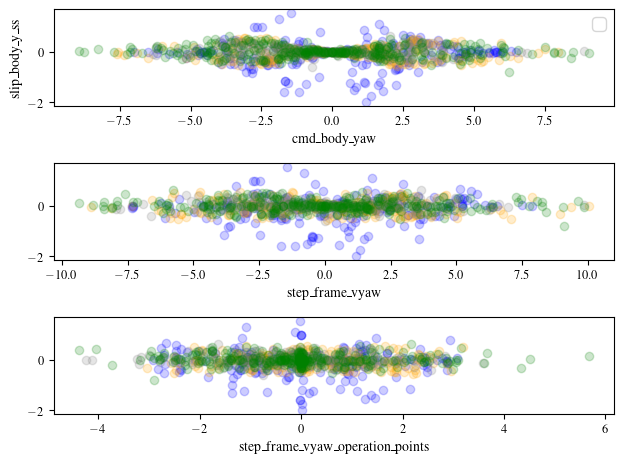

In [61]:
fig, ax = plt.subplots(3,1)

slip = 'slip_body_y_ss'


list_terrain = df_sampling_speed.terrain.unique()

for terrain in list_terrain:

    df_terrain = df_sampling_speed.loc[df_sampling_speed.terrain == terrain]
    
    # Scatter plot 
    ax[0].scatter(df_terrain.cmd_body_yaw_lwmean, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[1].scatter(df_terrain.step_frame_vyaw_steps, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[2].scatter(df_terrain.step_frame_vyaw_operation_points, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)

# Labels and title
ax[0].legend()
ax[0].set_xlabel('cmd_body_yaw')
ax[0].set_ylabel(slip)
ax[1].set_xlabel('step_frame_vyaw')
ax[2].set_xlabel('step_frame_vyaw_operation_points')
plt.tight_layout()

La correlation entre le slip en y et la commande en yaw ne semblent pas etre importante. 

# COnclusion 

Le point d'operation ne semblent pas avoir de correlation importante avec les derapages que se soient en vx ou en yaw. Les meilleurs correlations sont obtenues entre une vitesse et sa commande par exemple (Vx et Vyaw). 

# Avec quoi est-ce que le derapage en Vy est correle 

En effet, celui-ci n'a pas de commande. Il faut donc le correle avec quelque chose d'autre. 

/tmp/ipykernel_30073/3297395722.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


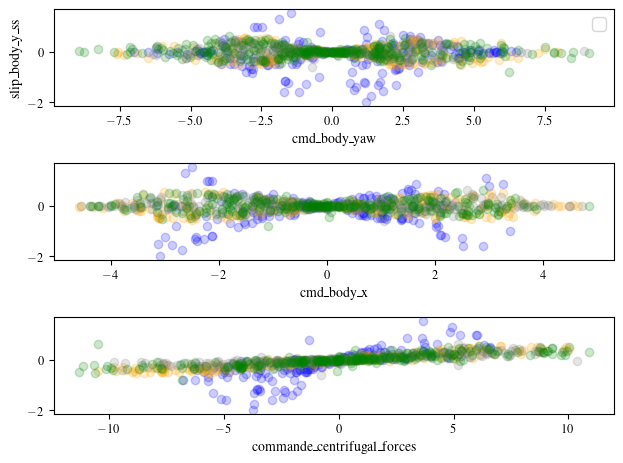

In [62]:
fig, ax = plt.subplots(3,1)

slip = 'slip_body_y_ss'


list_terrain = df_sampling_speed.terrain.unique()

for terrain in list_terrain:

    df_terrain = df_sampling_speed.loc[df_sampling_speed.terrain == terrain]
    
    # Scatter plot 
    ax[0].scatter(df_terrain.cmd_body_yaw_lwmean, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[1].scatter(df_terrain.cmd_body_x_lwmean, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[2].scatter(df_terrain.commanded_centrifgual_force, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)

# Labels and title
ax[0].legend()
ax[0].set_xlabel('cmd_body_yaw')
ax[0].set_ylabel(slip)
ax[1].set_xlabel('cmd_body_x')
ax[2].set_xlabel('commande_centrifugal_forces')
plt.tight_layout()

Dom mentionned using the centrifugal force in the slip_BLR which makes a lot of sense. However, we can see that Ice is not entirely linear to the commanded centrifugal forces.

However, the commande centrifugal forces might be good for relation but not necessarily for Ice where the current centrifugal forces might be stronger then the ones commanded. 



# Analysis of the correlation for DRIVE 

## For learning slip x

Drives only uses the longitudinal speed (output by the powertrain model which is not taken into accounts right now)

/tmp/ipykernel_30073/395161437.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


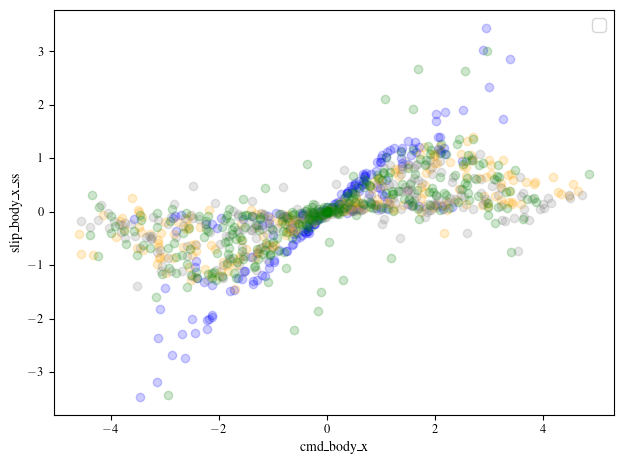

In [63]:
fig, ax = plt.subplots(1,1)

slip = 'slip_body_x_ss'


list_terrain = df_sampling_speed.terrain.unique()

for terrain in list_terrain:

    df_terrain = df_sampling_speed.loc[df_sampling_speed.terrain == terrain]
    
    # Scatter plot 
    ax.scatter(df_terrain.cmd_body_x_lwmean, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    
# Labels and title
ax.legend()
ax.set_xlabel('cmd_body_x')
ax.set_ylabel(slip)
plt.tight_layout()

# For learning slip in y 

/tmp/ipykernel_30073/1982722313.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


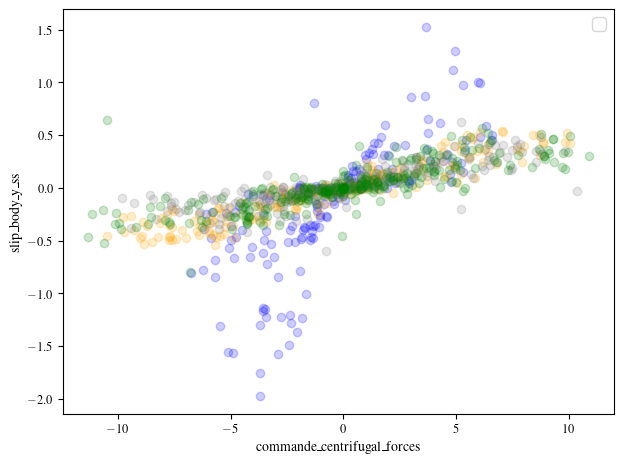

In [64]:
fig, ax = plt.subplots(1,1)

slip = 'slip_body_y_ss'


list_terrain = df_sampling_speed.terrain.unique()

for terrain in list_terrain:

    df_terrain = df_sampling_speed.loc[df_sampling_speed.terrain == terrain]
    
    # Scatter plot 
    ax.scatter(df_terrain.commanded_centrifgual_force, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)

# Labels and title
ax.legend()
ax.set_xlabel('commande_centrifugal_forces')
ax.set_ylabel(slip)
plt.tight_layout()

# For learning slip in yaw 

/tmp/ipykernel_30073/1391231951.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


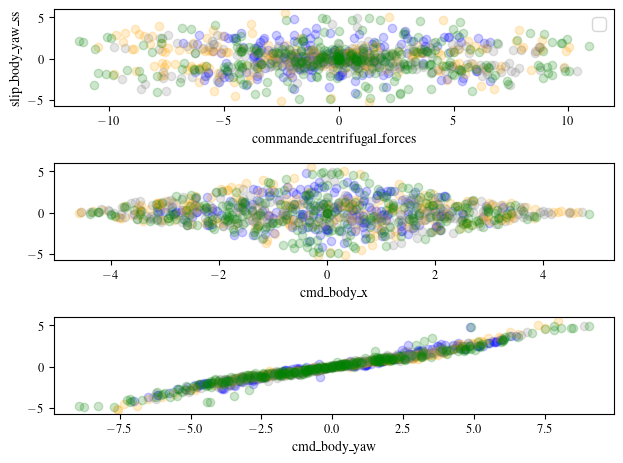

In [65]:
fig, ax = plt.subplots(3,1)

slip = 'slip_body_yaw_ss'


list_terrain = df_sampling_speed.terrain.unique()

for terrain in list_terrain:

    df_terrain = df_sampling_speed.loc[df_sampling_speed.terrain == terrain]
    
    # Scatter plot 
    ax[0].scatter(df_terrain.commanded_centrifgual_force, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[1].scatter(df_terrain.cmd_body_x_lwmean, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    ax[2].scatter(df_terrain.cmd_body_yaw_lwmean, df_terrain[slip], c=color_dict[terrain], marker='o',alpha=0.2)
    
# Labels and title
ax[0].legend()
ax[0].set_xlabel('commande_centrifugal_forces')
ax[0].set_ylabel(slip)
ax[1].set_xlabel('cmd_body_x')
ax[2].set_xlabel('cmd_body_yaw')



plt.tight_layout()

Even if the logic makes senses, it seems that the linear speed is uselesse as it is not linear at all. The centrifugal forces seems to be elading to a potential bad fitting of a linear model because it could be one horizontal line at 0. 

# Analysing the problem with error of the pwrtrain_model 

In [82]:
df = pd.read_pickle("/home/nicolassamson/ros2_ws/src/DRIVE/drive_datasets/results_multiple_terrain_dataframe/all_terrain_slip_dataset.pkl")

body_vel_disturption_x = column_type_extractor(df,"body_vel_disturption_x")
body_vel_disturption_y = column_type_extractor(df,"body_vel_disturption_y")
body_vel_disturption_yaw = column_type_extractor(df,"body_vel_disturption_yaw")


body_vel_disturption_x = column_type_extractor(df,"body_vel_disturption_x")
pwrtrain_conscient_cmd_body_vel_x = column_type_extractor(df,"pwrtrain_conscient_cmd_body_vel_x")
pwrtrain_conscient_cmd_body_vel_y = column_type_extractor(df,"pwrtrain_conscient_cmd_body_vel_y")
pwrtrain_conscient_cmd_body_vel_yaw = column_type_extractor(df,"pwrtrain_conscient_cmd_body_vel_yaw")

print_column_unique_column(df)

print(df.terrain.unique())

['body_vel_disturption_x' 'body_vel_disturption_y'
 'body_vel_disturption_yaw' 'calib_step' 'cmd_body_vel_x' 'cmd_body_vel_y'
 'cmd_body_vel_yaw' 'cmd_left' 'cmd_right' 'end_time' 'gt_icp_pitch'
 'gt_icp_roll' 'gt_icp_x' 'gt_icp_y' 'gt_icp_yaw' 'gt_icp_z'
 'icp_corrected_interpolated_x' 'icp_corrected_interpolated_y'
 'icp_interpolated_x' 'icp_interpolated_y' 'icp_interpolated_yaw'
 'icp_omega' 'icp_pitch' 'icp_roll' 'icp_vel_x' 'icp_vel_y' 'icp_vel_yaw'
 'icp_vx' 'icp_vy' 'icp_x' 'icp_y' 'icp_yaw' 'icp_z' 'id' 'idd_vel_x'
 'idd_vel_y' 'idd_vel_yaw' 'imu_acceleration_x' 'imu_acceleration_y'
 'imu_acceleration_z' 'imu_yaw' 'init_icp_pitch' 'init_icp_roll'
 'init_icp_x' 'init_icp_y' 'init_icp_yaw' 'init_icp_z'
 'init_tf_pose_pitch' 'init_tf_pose_roll' 'init_tf_pose_x'
 'init_tf_pose_y' 'init_tf_pose_yaw' 'init_tf_pose_z' 'left_wheel_vel'
 'max_ang_speed_sampled' 'max_linear_speed_sampled'
 'precedent_window_operation_point_mask'
 'pwrtrain_conscient_cmd_body_vel_x' 'pwrtrain_conscient_cm

# For error in x

[-0.0003298  -0.00032677 -0.00031949 ...  0.12622798  0.12788694
  0.12788694]
[-0.09095089 -0.0906925  -0.09039348 ...  0.72605022  0.72605476
  0.72605476]
[-2.61396407 -2.61248122 -2.60868269 ... -2.11048004 -2.24105656
 -2.24105656]
[-1.98561988e-03 -1.97748159e-03 -1.95313956e-03 ...  2.61264805e+00
  2.48823785e+00  2.48823785e+00]


/tmp/ipykernel_30073/3919090603.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


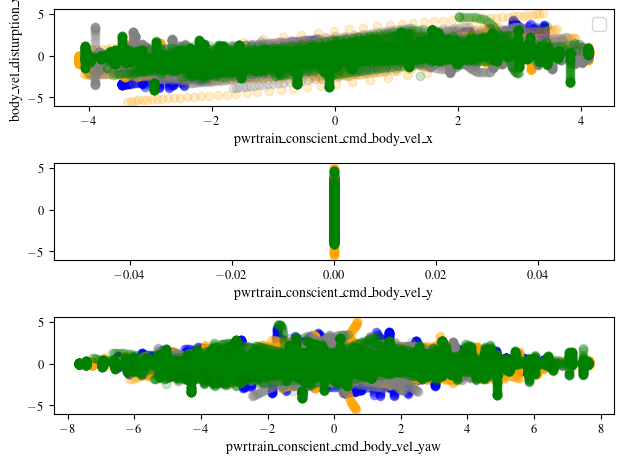

In [84]:
fig, ax = plt.subplots(3,1)

slip = 'body_vel_disturption_x'


list_terrain = df_sampling_speed.terrain.unique()

for terrain in list_terrain:

    df_terrain = df.loc[df.terrain == terrain]
    print(body_vel_disturption_x)
    
    body_vel_disturption_x = np.ravel(column_type_extractor(df_terrain,slip))
    pwrtrain_conscient_cmd_body_vel_x = np.ravel(column_type_extractor(df_terrain,"pwrtrain_conscient_cmd_body_vel_x"))
    pwrtrain_conscient_cmd_body_vel_y = np.ravel(column_type_extractor(df_terrain,"pwrtrain_conscient_cmd_body_vel_y"))
    pwrtrain_conscient_cmd_body_vel_yaw = np.ravel(column_type_extractor(df_terrain,"pwrtrain_conscient_cmd_body_vel_yaw"))


    
    # Scatter plot 
    ax[0].scatter(pwrtrain_conscient_cmd_body_vel_x,body_vel_disturption_x, c=color_dict[terrain], marker='o',alpha=0.2)
    ax[1].scatter(pwrtrain_conscient_cmd_body_vel_y, body_vel_disturption_x, c=color_dict[terrain], marker='o',alpha=0.2)
    ax[2].scatter(pwrtrain_conscient_cmd_body_vel_yaw, body_vel_disturption_x, c=color_dict[terrain], marker='o',alpha=0.2)

# Labels and title
ax[0].legend()
ax[0].set_xlabel('pwrtrain_conscient_cmd_body_vel_x')
ax[0].set_ylabel(slip)
ax[1].set_xlabel('pwrtrain_conscient_cmd_body_vel_y')
ax[2].set_xlabel('pwrtrain_conscient_cmd_body_vel_yaw')

plt.tight_layout()

# For slip in y 

/tmp/ipykernel_30073/2253300101.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


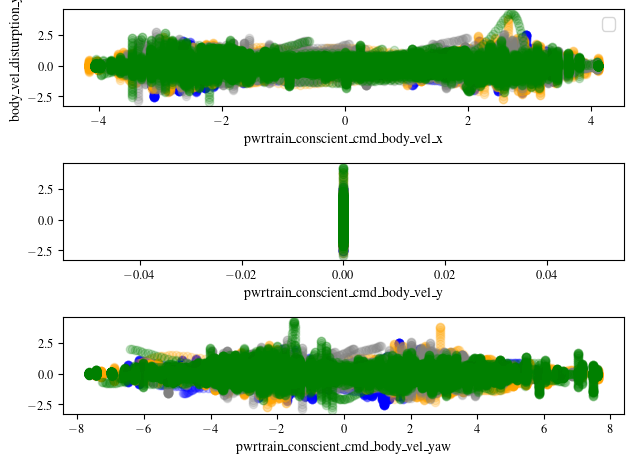

In [86]:
fig, ax = plt.subplots(3,1)

slip = 'body_vel_disturption_y'


list_terrain = df_sampling_speed.terrain.unique()

for terrain in list_terrain:

    df_terrain = df.loc[df.terrain == terrain]
    
    
    body_vel_disturption_x = np.ravel(column_type_extractor(df_terrain,slip))
    pwrtrain_conscient_cmd_body_vel_x = np.ravel(column_type_extractor(df_terrain,"pwrtrain_conscient_cmd_body_vel_x"))
    pwrtrain_conscient_cmd_body_vel_y = np.ravel(column_type_extractor(df_terrain,"pwrtrain_conscient_cmd_body_vel_y"))
    pwrtrain_conscient_cmd_body_vel_yaw = np.ravel(column_type_extractor(df_terrain,"pwrtrain_conscient_cmd_body_vel_yaw"))


    
    # Scatter plot 
    ax[0].scatter(pwrtrain_conscient_cmd_body_vel_x,body_vel_disturption_x, c=color_dict[terrain], marker='o',alpha=0.2)
    ax[1].scatter(pwrtrain_conscient_cmd_body_vel_y, body_vel_disturption_x, c=color_dict[terrain], marker='o',alpha=0.2)
    ax[2].scatter(pwrtrain_conscient_cmd_body_vel_yaw, body_vel_disturption_x, c=color_dict[terrain], marker='o',alpha=0.2)

# Labels and title
ax[0].legend()
ax[0].set_xlabel('pwrtrain_conscient_cmd_body_vel_x')
ax[0].set_ylabel(slip)
ax[1].set_xlabel('pwrtrain_conscient_cmd_body_vel_y')
ax[2].set_xlabel('pwrtrain_conscient_cmd_body_vel_yaw')

plt.tight_layout()

# For slip in yaw

/tmp/ipykernel_30073/2250001699.py:26: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


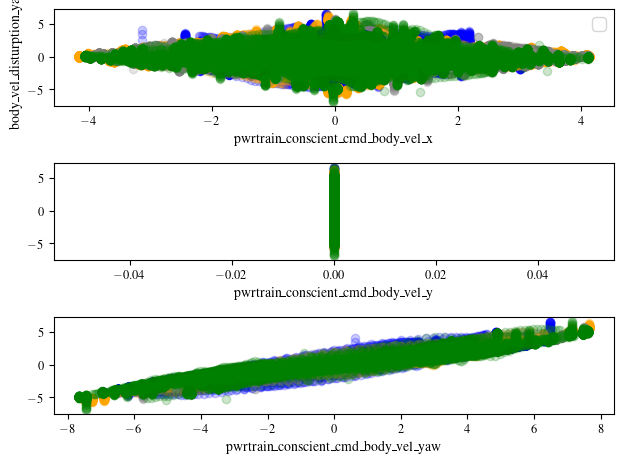

In [85]:
fig, ax = plt.subplots(3,1)

slip = 'body_vel_disturption_yaw'


list_terrain = df_sampling_speed.terrain.unique()

for terrain in list_terrain:

    df_terrain = df.loc[df.terrain == terrain]
    
    
    body_vel_disturption_x = np.ravel(column_type_extractor(df_terrain,slip))
    pwrtrain_conscient_cmd_body_vel_x = np.ravel(column_type_extractor(df_terrain,"pwrtrain_conscient_cmd_body_vel_x"))
    pwrtrain_conscient_cmd_body_vel_y = np.ravel(column_type_extractor(df_terrain,"pwrtrain_conscient_cmd_body_vel_y"))
    pwrtrain_conscient_cmd_body_vel_yaw = np.ravel(column_type_extractor(df_terrain,"pwrtrain_conscient_cmd_body_vel_yaw"))


    
    # Scatter plot 
    ax[0].scatter(pwrtrain_conscient_cmd_body_vel_x,body_vel_disturption_x, c=color_dict[terrain], marker='o',alpha=0.2)
    ax[1].scatter(pwrtrain_conscient_cmd_body_vel_y, body_vel_disturption_x, c=color_dict[terrain], marker='o',alpha=0.2)
    ax[2].scatter(pwrtrain_conscient_cmd_body_vel_yaw, body_vel_disturption_x, c=color_dict[terrain], marker='o',alpha=0.2)

# Labels and title
ax[0].legend()
ax[0].set_xlabel('pwrtrain_conscient_cmd_body_vel_x')
ax[0].set_ylabel(slip)
ax[1].set_xlabel('pwrtrain_conscient_cmd_body_vel_y')
ax[2].set_xlabel('pwrtrain_conscient_cmd_body_vel_yaw')

plt.tight_layout()